# Fantano Review Notebook 3 - Neural Net

*In this project*, I will analyze and visualize data of albums rated by "The Internet's Busiest Music Nerd," Anthony Fantano. I will then create a Neural Network to predict ratings that Fantano would give to albums.

*In this third notebook*, I will create a Neural Network to predict ratings that Fantano would give to albums.

# Step 1 - Prepare the data for modeling

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers.advanced_activations import LeakyReLU
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


/Users/emilywilliams/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/emilywilliams/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/emilywilliams/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/emilywilliams/opt/anaconda3/lib/python3

In [2]:
fantano_df = pd.read_csv('fantano_spotify.csv')

In [3]:
fantano_df.columns

Index(['Unnamed: 0', 'artist_name', 'album_name', 'spotify_id', 'popularity',
       'duration_ms', 'tempo', 'loudness', 'instrumentalness', 'acousticness',
       'speechiness', 'liveness', 'danceability', 'energy', 'valence', 'key',
       'mode', 'time_signature', 'duration_ms_standard_dev',
       'tempo_standard_dev', 'loudness_standard_dev',
       'instrumentalness_standard_dev', 'acousticness_standard_dev',
       'speechiness_standard_dev', 'liveness_standard_dev',
       'danceability_standard_dev', 'energy_standard_dev',
       'valence_standard_dev', 'score'],
      dtype='object')

In [4]:
# Normalizing values for 'popularity', 'duration_ms', and 'tempo' by converting them to their z-scores

fantano_df['popularity'] = (fantano_df['popularity'] - fantano_df['popularity'].mean()) / fantano_df['popularity'].std()

fantano_df['duration_ms'] = (fantano_df['duration_ms'] - fantano_df['duration_ms'].mean()) / fantano_df['duration_ms'].std()

fantano_df['tempo'] = (fantano_df['tempo'] - fantano_df['tempo'].mean()) / fantano_df['tempo'].std()


In [5]:
# turn label ('score') into One-hot vector (since it's categorical)

label = fantano_df['score']
one_hot_label = to_categorical(label)

print(one_hot_label[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [6]:
# create a 'features' matrix - this will be the df, but only keeping the columns that will be used as features

features = fantano_df.drop(columns=['Unnamed: 0', 'artist_name', 'album_name', 'spotify_id',
                                    'key', 'time_signature', 'mode', 'score'])

features.columns # these are the features we will be training our model on

Index(['popularity', 'duration_ms', 'tempo', 'loudness', 'instrumentalness',
       'acousticness', 'speechiness', 'liveness', 'danceability', 'energy',
       'valence', 'duration_ms_standard_dev', 'tempo_standard_dev',
       'loudness_standard_dev', 'instrumentalness_standard_dev',
       'acousticness_standard_dev', 'speechiness_standard_dev',
       'liveness_standard_dev', 'danceability_standard_dev',
       'energy_standard_dev', 'valence_standard_dev'],
      dtype='object')

In [7]:
# split training and testing data

x_train, x_test, y_train, y_test = train_test_split(features, one_hot_label, test_size=0.2, random_state=13)

# Step 2 - Create & compile model

In [8]:
# create model

model = Sequential()

model.add(Dense(units=16,
                input_shape = x_train.shape[1:]))
model.add(LeakyReLU())

model.add(Dense(units=32))
model.add(LeakyReLU())

model.add(Dense(units=64))
model.add(LeakyReLU())

model.add(Dense(units=11, 
                activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                352       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 11)               

In [9]:
# Compile model

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False), metrics=['accuracy'])


# Step 3 - Fit the model to the train data

In [10]:
# Fit model

history = model.fit(x_train, y_train, batch_size=128, epochs=100, verbose=1, validation_split=0.2)


Train on 957 samples, validate on 240 samples
Epoch 1/100
957/957 [==============================] - 1s 672us/step - loss: 3558.7637 - accuracy: 0.0345 - val_loss: nan - val_accuracy: 0.2583
Epoch 2/100
957/957 [==============================] - 0s 24us/step - loss: 1347.8136 - accuracy: 0.1870 - val_loss: nan - val_accuracy: 0.0333
Epoch 3/100
957/957 [==============================] - 0s 24us/step - loss: 621.5801 - accuracy: 0.1964 - val_loss: nan - val_accuracy: 0.2583
Epoch 4/100
957/957 [==============================] - 0s 24us/step - loss: 434.2424 - accuracy: 0.2382 - val_loss: nan - val_accuracy: 0.2500
Epoch 5/100
957/957 [==============================] - 0s 23us/step - loss: 338.5403 - accuracy: 0.1338 - val_loss: nan - val_accuracy: 0.1833
Epoch 6/100
957/957 [==============================] - 0s 24us/step - loss: 203.8730 - accuracy: 0.2142 - val_loss: nan - val_accuracy: 0.2583
Epoch 7/100
957/957 [==============================] - 0s 25us/step - loss: 103.9005 - accur

957/957 [==============================] - 0s 22us/step - loss: 110.0829 - accuracy: 0.1787 - val_loss: nan - val_accuracy: 0.2583
Epoch 57/100
957/957 [==============================] - 0s 22us/step - loss: 79.6809 - accuracy: 0.1996 - val_loss: nan - val_accuracy: 0.2583
Epoch 58/100
957/957 [==============================] - 0s 23us/step - loss: 85.9047 - accuracy: 0.1891 - val_loss: nan - val_accuracy: 0.2500
Epoch 59/100
957/957 [==============================] - 0s 21us/step - loss: 87.6179 - accuracy: 0.1996 - val_loss: nan - val_accuracy: 0.2333
Epoch 60/100
957/957 [==============================] - 0s 21us/step - loss: 118.3813 - accuracy: 0.1933 - val_loss: nan - val_accuracy: 0.2583
Epoch 61/100
957/957 [==============================] - 0s 21us/step - loss: 123.4626 - accuracy: 0.1536 - val_loss: nan - val_accuracy: 0.2375
Epoch 62/100
957/957 [==============================] - 0s 21us/step - loss: 96.2763 - accuracy: 0.1850 - val_loss: nan - val_accuracy: 0.2583
Epoch 63/

# Step 4 - Visualize the model progression, change hyperparameters as necessary

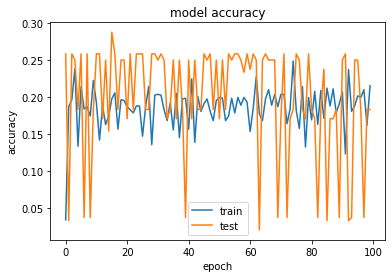

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

# Conclusions

After adjusting the hyperparameters several times, the best accuracy I could get on the validation data is 25%. This is, of course, unacceptably low accuracy. This model exhibits extremely *high bias*. High bias models can be improved through the following tactics:

* Introducing new / different features
* Adding polynomial features / feature crosses (in simpler models such as Logistic Regression or Linear Regression)
* Adding layers / nodes (in a Neural Network)
* Decreasing regularization

Since I am using a Neural Network rather than a simpler model, adding polynomial features and feature crosses is unlikely to help. I am not currently using any regularization in my model, so I cannot decrease regularization. I did try adding layers and nodes to my Neural Net, but I get the highest accuracy with my current model (still very low accuracy).

It appears that the best 'next step' for my model would be to try and find better features. Andrew Ng, professor of Machine Learning at Stanford, says that a machine learning model will only work if the features adequently inform the label. If an expert in the field could not predict the label given the features, a machine learning model cannot predict the lable either. My features do not adequently inform the label. 

I believe that my initial hypothesis was overly ambitious. I hoped to predict the ratings that one particular person, who has a very wide range of musical tastes, would give to different albums. The features I used were what was available to me from Spotify's API. Perhaps one could collect a set of features that play a stronger role in Fantano's rating process, or perhaps his rating process rests on less mathematical decision making. 